# Beginning practical functions
This notebook goes through the process of how to write a function. It assumes a little knowledge about what a function is, and how to use pandas and do basic plotting, but, assuming you know that, it's a nice place to start with thinking about how you can use them in a way that's actually useful(ish). As always, this notebook uses publicly avaliable data so the examples given might not be the most relevant, but the useful concepts are still there.  At the end of the notebook (after all the graphs) there's an exercise for you to try to get some practice in.

## Getting started
For the purposes of this notebook exercise, let's imagine we had been given the task of working out how the headcount of students of different ethnicties is changing in our LA. For this we want to do a number of things, but our output is likely going to be a plot for student headcount for each ethnicity, with some kind of analysis so we can visualise how it's changing, and maybe make predicitions. Lets imagine we've also been told that whoever wants this information knows that reporting on student headcounts differs in some years, so they want to be able to change the start year of these plots easily.

That's a lot of graphs to make individually, but, if we write it as a function, we can loop through it once for every ethnicity, meaning we only have to write the code to make the graph once, and we'll get a load of graphs out the end!

First off, installing packages using piplite and importing them. Using piplite is only going to be needed if you are on jupyterlite, if you are coding using anaconda to run Jupyter, skip right to importing. If you're using something else, you may need to install packages using pip in the terminal.

We're using pretty standard packages here, pandas to organising data, and Matplotlib and Seaborn for Plotting.

In [1]:
import piplite

await piplite.install('pandas')
await piplite.install('matplotlib')
await piplite.install('seaborn')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Getting the data in
First off, getting data in with Pandas and making some selections. Here I'm reading data from the filepath (relative to the location of the code's filepath) data/spc_pupils_ethnicity_and_language_.csv maining that it's in the data subfolder.

I then print out the info about the dataframe, and the head (first 5 rows) to see what I'm working with and what sort of data organisation I need to do to make it workable.

After this, I slice out just the columns of the dataframe I need to make it quicker and easier to work with. I do this by setting df equal to a list of the fields I want.

Next, I'm setting some conditions I'll use to slice my dataframe: only taking rows where the la_name field is East Sussex, only rows where the phase_type_condition is total, and removing rows where the ethnicity is Total. It also takes the time_period field, converts it to a string and takes only the first four characters of the sting, then re-converts that to a float. This is needed as the time_period is given as 201516 etc to mean 2015-16, which plotting libraries don't understand as years.

In [5]:
df = pd.read_csv('data/spc_pupils_ethnicity_and_language_.csv')
print(df.info())
print(df.head())
      
df = df[['la_name', 'phase_type_grouping', 'time_period', 'ethnicity', 'headcount']]
print(df.head())
      
condition = df['la_name'] == 'East Sussex'
df = df[condition]

condition_2 = df['phase_type_grouping'] == 'Total'
df = df[condition_2]

df = df[df['ethnicity'] != 'Total' ]

df['time_period'] = df['time_period'].astype('str').str[0:4].astype('float')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154192 entries, 0 to 154191
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time_period          154192 non-null  int64  
 1   time_identifier      154192 non-null  object 
 2   geographic_level     154192 non-null  object 
 3   country_code         154192 non-null  object 
 4   country_name         154192 non-null  object 
 5   region_name          153065 non-null  object 
 6   region_code          153065 non-null  object 
 7   old_la_code          142922 non-null  float64
 8   la_name              142922 non-null  object 
 9   new_la_code          142922 non-null  object 
 10  phase_type_grouping  154192 non-null  object 
 11  ethnicity            154192 non-null  object 
 12  language             154192 non-null  object 
 13  headcount            154192 non-null  int64  
 14  percent_of_pupils    154192 non-null  float64
dtypes: float64(2), in

## Drafting a fucntion
The next thing you can do, especially if you're new to writing functions, is write the sort of code that you'd use in your function, but just for one set of variables, sort of a draft to later put in a function. Normally, you wouldn't see this as I'd work it right into the function, but I've kept it here as a demo. Recall the brief, we want to plot a graph for every ethnicity, and with the ability to change the year the plot starts from.

First off, plt.clf() clears any current figures in the notebook's memory, not technically necessary, but if you've run this notebook multiple times some weird things might happen, so I've kept it in to be safe. 

Next, I'm initialising a new data frame to plot from which takes only data starting in 2015, and which only takes 'White - Traveller of Irish heritage' as the ethnicity, we'll be able to change these out later to make them variables the function can use.

After this, I used Seaborn's regression plot function, with our new dataframe as our data, plotting headcount against time_period, exactly in the brief. The regression plot also, unsuprisingly, does regression analysis to help determine if there is a relationship between time and the headcount of a given ethnicity and then use plt.show() to show the plot.

This version of the plot, for one set of variables gives us a good starting point to build our function from.

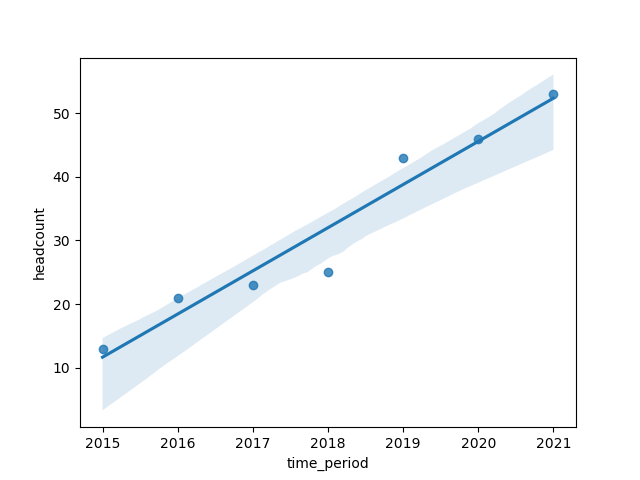

In [9]:
    plt.clf()
    plot_data = df[df['time_period'] >= 2015]
    plot_data = plot_data[plot_data['ethnicity'] == 'White - Traveller of Irish heritage']
    sns.regplot(data=plot_data, x='time_period', y='headcount')
    plt.show()

## Writing a function
Next up is getting the draft code into a fucntion. The easiest way to do this, I think, is to change the variables in the draft code into variables that can be changed, rather than fixed ones, you'll notice 2015, and 'White - Traveller of Irish heritage' have been replaced with start_period and plot_ethnicity, which are the names of the variables we can pass to the fucntion when we define it in the first line of the code block. You'll then see, the last line of the block uses 2015 and 'White - Traveller of Irish heritage' again to test the function, to make sure it returns the same plot as before.

In essence, all that's been done here is a line to define the function has been made, the variables have been changed to take whatever is passed to the function, and the function is called using the original values.

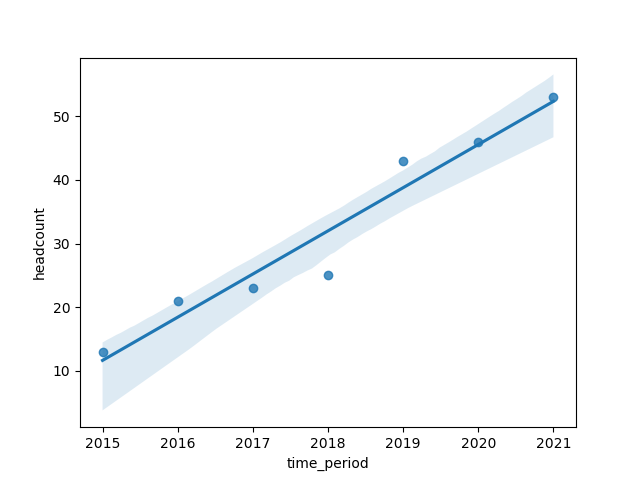

In [11]:
def plot_ethnicity_time(start_period, plot_ethnicity):
    plt.clf()
    data = df[df['time_period'] >= start_period]
    data = data[data['ethnicity'] == plot_ethnicity]
    sns.regplot(data=data, x='time_period', y='headcount')
    plt.show()

plot_ethnicity_time(2015, 'White - Traveller of Irish heritage')

## Finishing up

Right, so,we've now got a function that can take any ethnicity and starting period and then plot a regression to show how the headcount of that ethnicity changes over time. Now we need to plot the graph for each ethnicity in the data. We can get a list of all the unique ethnicities in the data using pandas .unique() method on the ethnicity column. We can then iterate through this list using a for loop, giving each value in the list as the ethnicity in the function. This makes all of our graphs, job done!

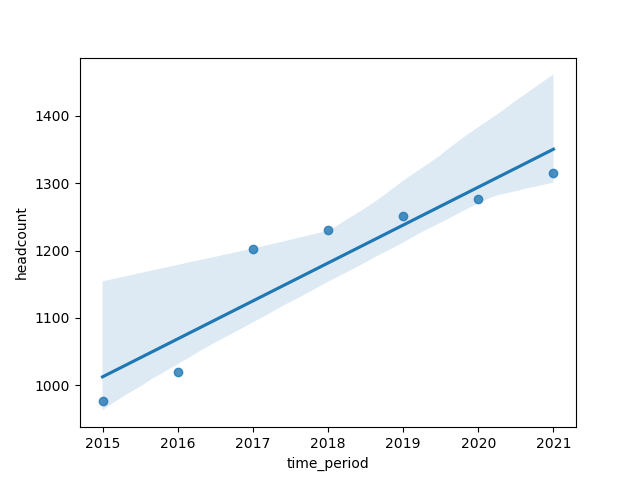

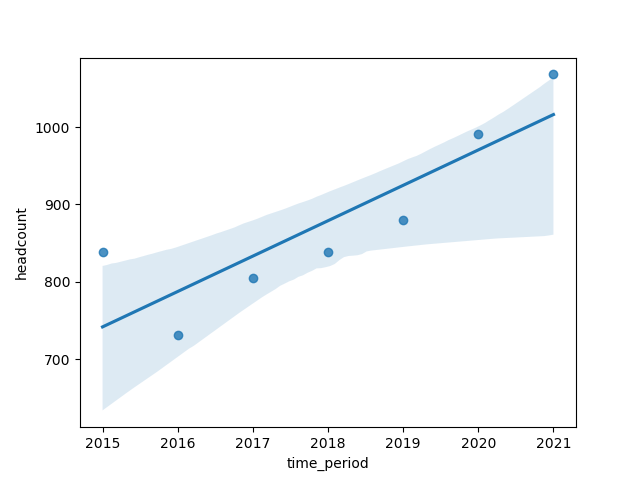

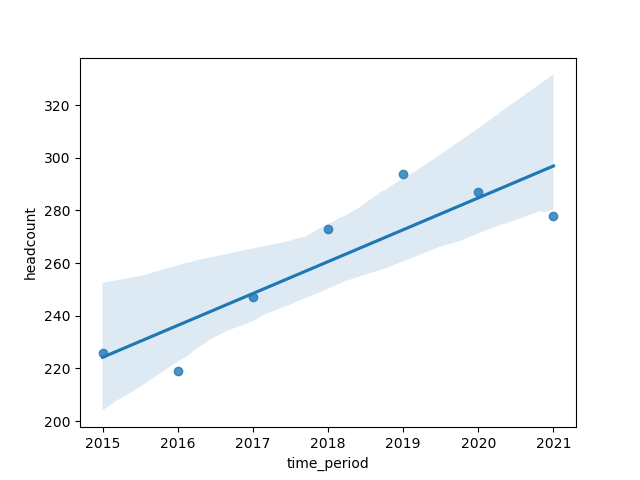

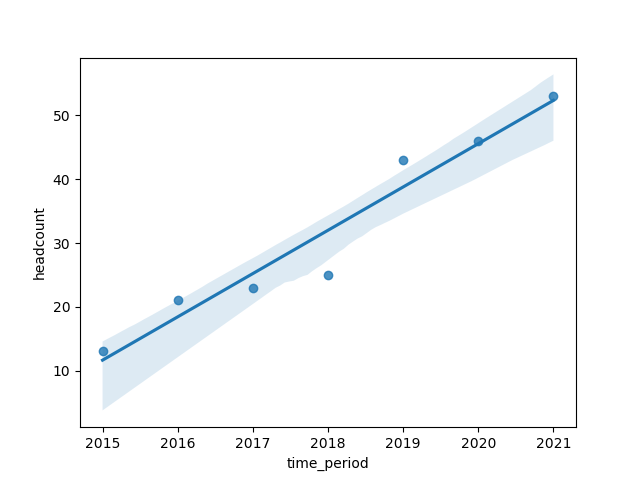

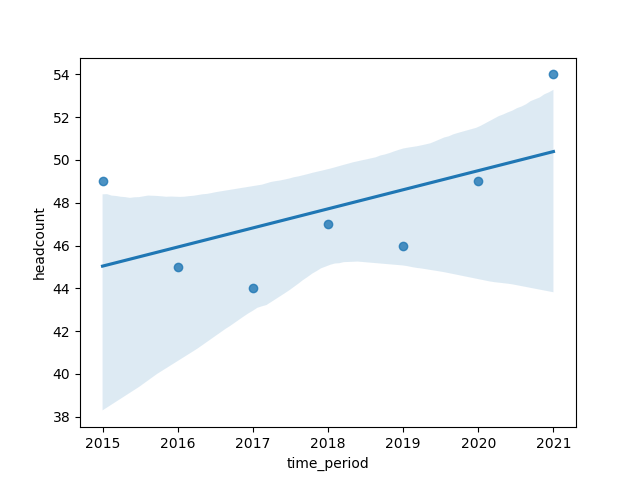

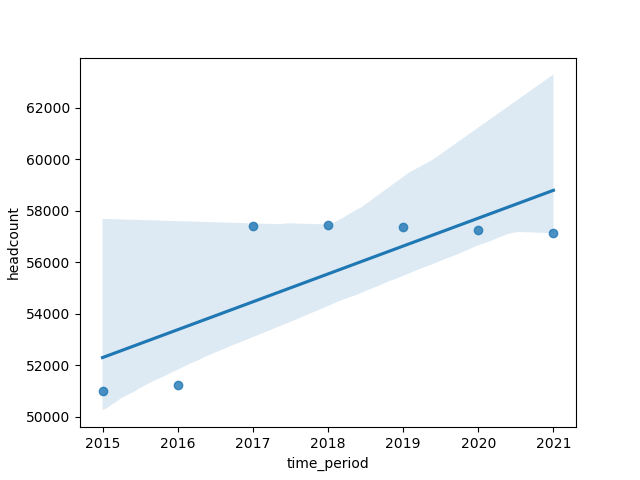

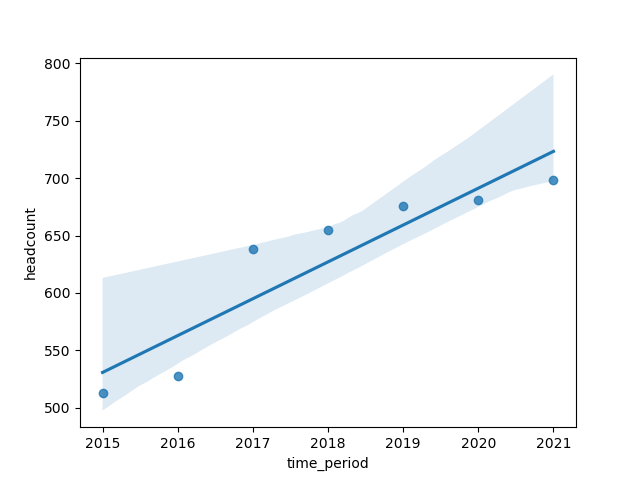

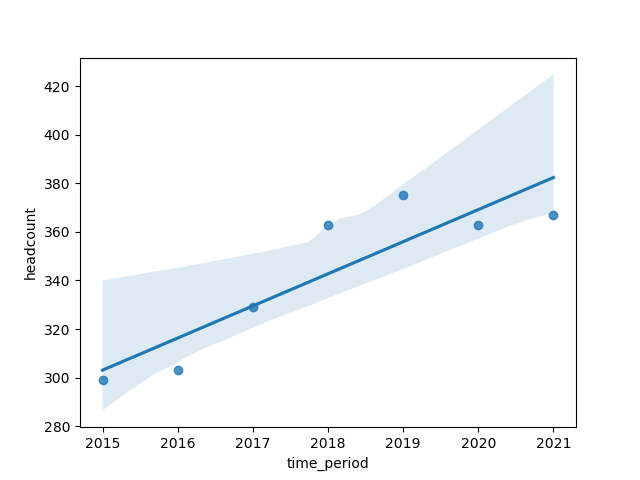

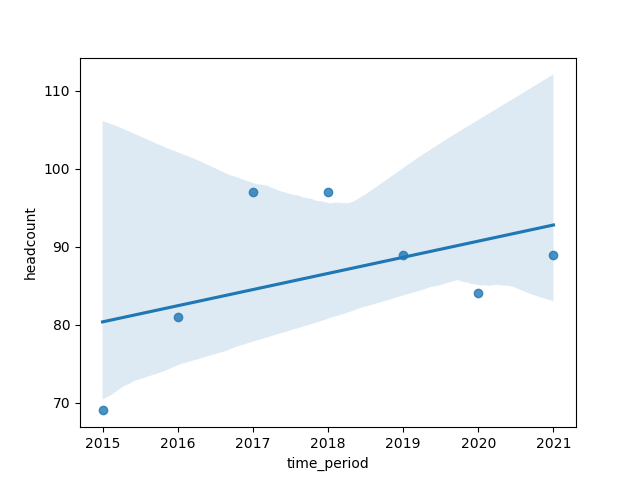

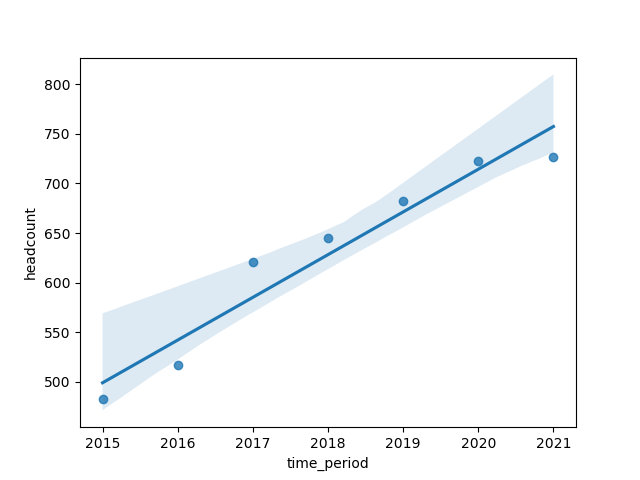

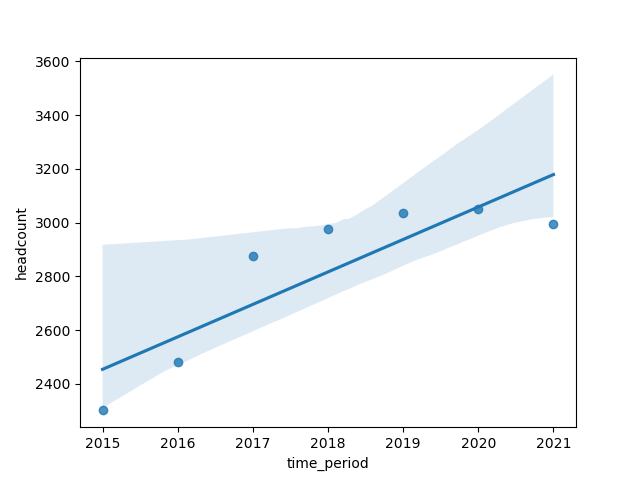

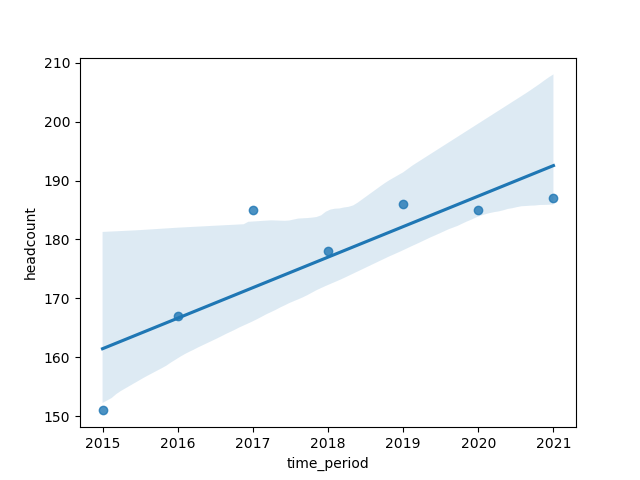

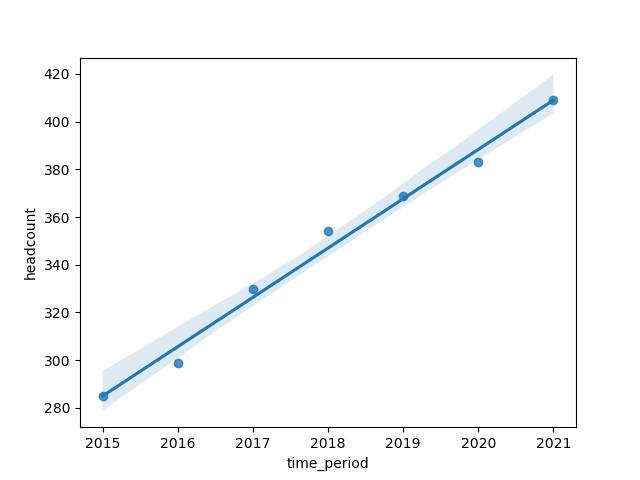

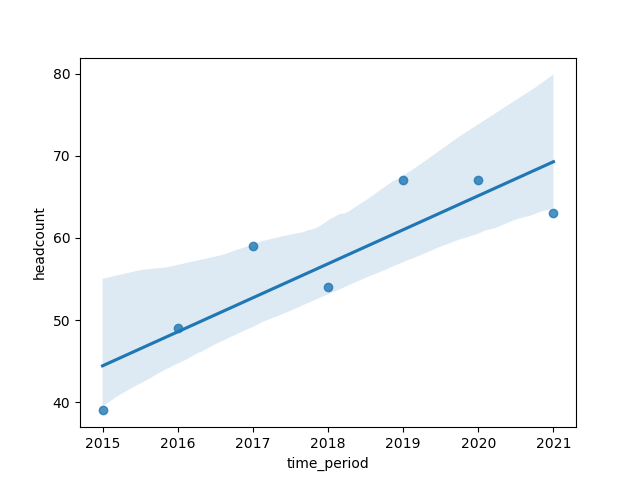

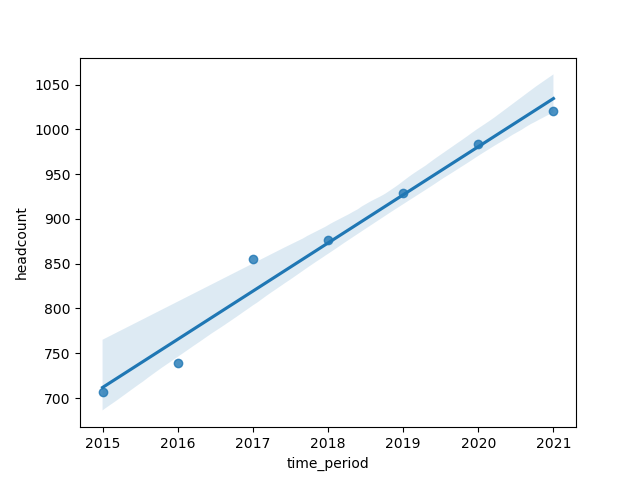

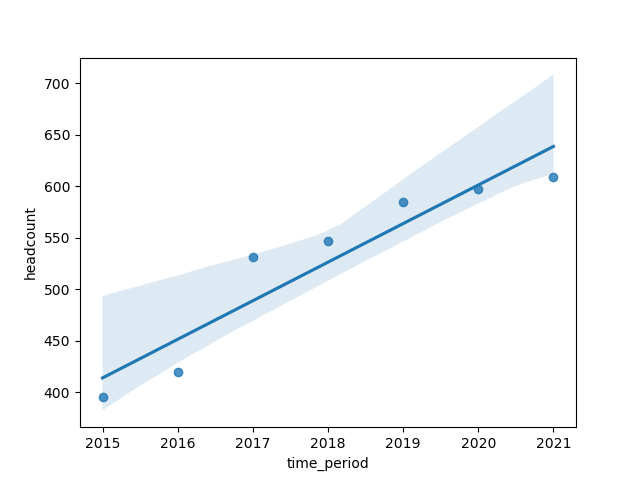

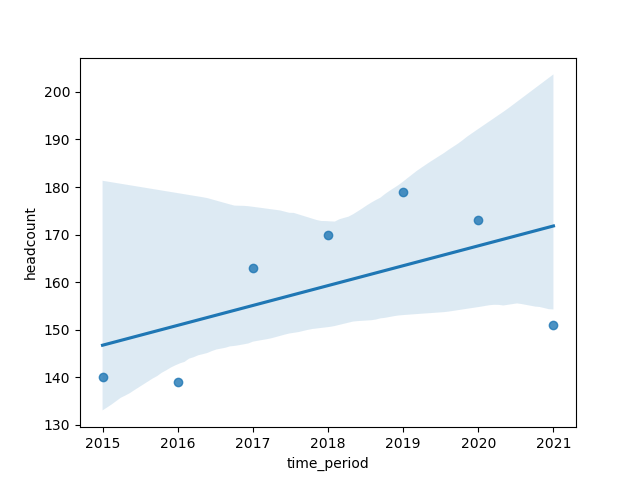

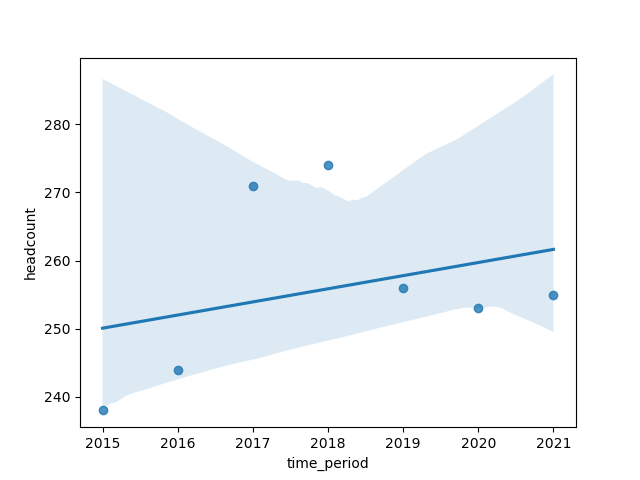

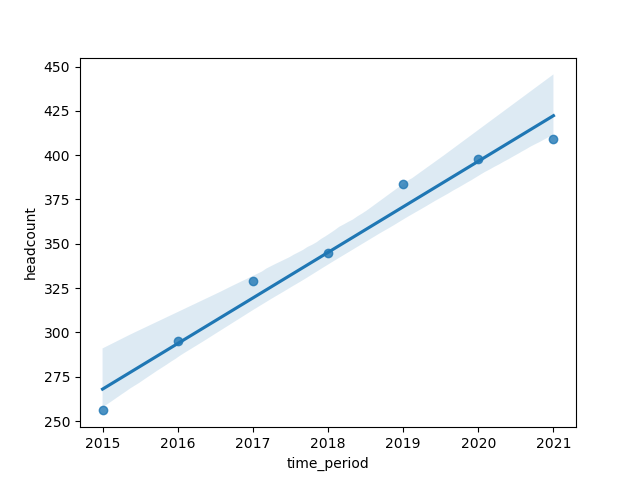

In [12]:
ethnicities = df['ethnicity'].unique()

for eth in ethnicities:
    plot_ethnicity_time(2015, eth)

# Now for you to give it a go
Below, I've started you off, but imagine you've impressed management with your plots. They now want you to do the same, but instad of changing ethnicity, they want you to get a plot for the total headcount of students in each LA in the data by writing a function to allow you to select an LA to plot for, and then iterating through every LA in the data.

I've started you off by getting the data in and making some slices to make the data easier to work with.

In [15]:
df = pd.read_csv('data/spc_pupils_ethnicity_and_language_.csv')

condition = df['language'] == 'Total'
df = df[condition]

condition_2 = df['phase_type_grouping'] == 'Total'
df = df[condition_2]

df = df[df['ethnicity'] == 'Total' ]

df['time_period'] = df['time_period'].astype('str').str[0:4].astype('float')

df = df[['time_period', 'la_name', 'headcount']]
print(df)

plot_data = []

        time_period       la_name  headcount
14           2021.0    Derbyshire     109231
49           2021.0         Derby      44500
230          2021.0         Luton      40451
310          2021.0  Peterborough      40121
492          2021.0        Camden      22208
...             ...           ...        ...
153298       2015.0        Sefton      35050
153560       2015.0       Bromley      44797
153588       2015.0     Wakefield      43153
153936       2015.0           NaN     653431
153981       2015.0           NaN     701055

[1132 rows x 3 columns]


## Give it a go:
You've now got a dataframe of time periods, and every LA and their total headcount in that time period, plot_data has also been set to an empty list so, if you use it there shouldn't be any issues. that should be enough to get going with.

Now, the steps you need to take:
1. Draft your plot for one LA and test it using an LA of your choice. Don't worry about having a year variable.
2. Define a function that takes a variable as an argument that can be passed different la_names to change the plot, and test it using the same LA as your intial draft plot.
3. Get a list of all the unique values in la_names and use a for loop to iterate through them passing each one to the function you wrote to plat all the graphs in one go.
4. You're done!